In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
houses=pd.read_csv('train.csv')

In [ ]:
#Explorando los datos 

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
houses.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
houses.shape

(1460, 81)

In [ ]:
#Por el número de valores ausentes, desde ahora puedo eliminar 4 columnas 

In [7]:
houses1 = houses.drop(columns=["PoolQC","MiscFeature","Alley","Fence"])

In [49]:
#Relaciones entre las variables 

In [8]:
is_numeric= houses1._get_numeric_data()
is_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
corr =is_numeric.corr()

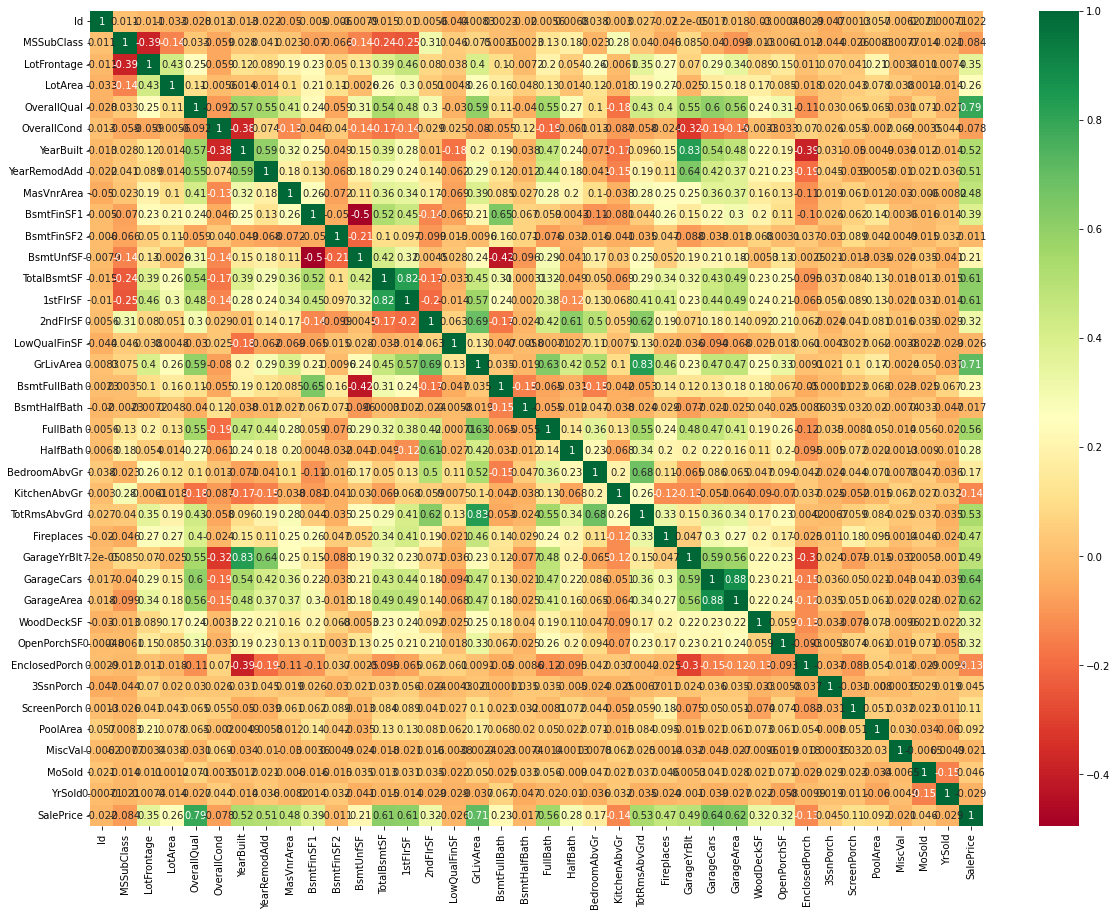

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,cmap= 'RdYlGn',vmin=None, vmax=None,annot=True)
plt.show()

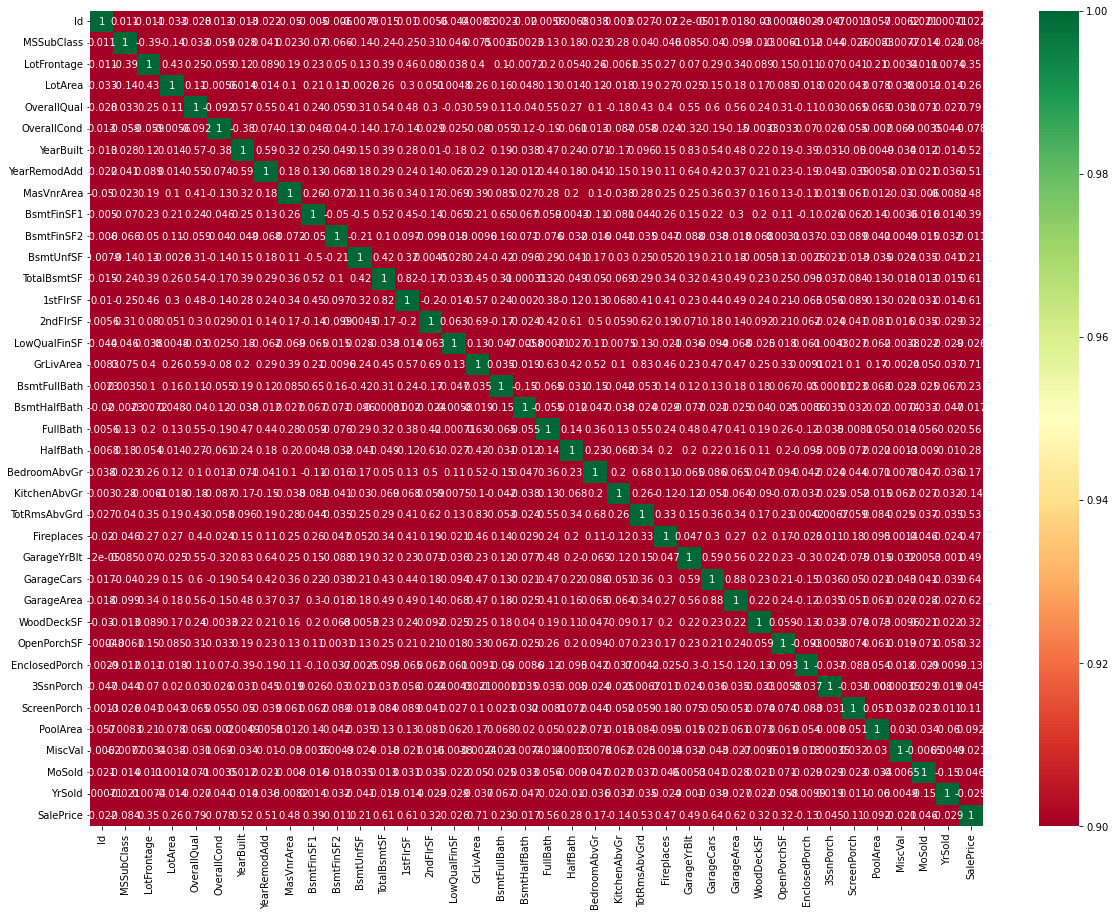

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,cmap= 'RdYlGn',vmin=.90, vmax=1,annot=True)
plt.show()

In [12]:
#Buscando correlaciones negativas importantes 
corr[corr <= -.90].count()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [14]:
houses.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
#NAN's treatment

In [15]:
#Si no tienen más del 50% de datos faltantes, vamos a trabajar con ellas 
houses1.shape[0]*.5

730.0

In [16]:
#La cantidad de missing values en FireplaceQU es la misma que las casas sin Fire places 
print(houses1["FireplaceQu"].isnull().sum())
print(len(houses1[houses1['Fireplaces']==0])) 

690
690


In [17]:
houses1["FireplaceQu"] = houses1["FireplaceQu"].fillna("NF")

In [18]:
#LotFrontage
houses1['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [19]:
houses1['LotFrontage'].value_counts().sort_values(ascending=True)

46.0       1
112.0      1
168.0      1
182.0      1
111.0      1
        ... 
75.0      53
50.0      57
80.0      69
70.0      70
60.0     143
Name: LotFrontage, Length: 110, dtype: int64

In [20]:
houses1['LotFrontage'][:100]

0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
      ... 
95     NaN
96    78.0
97    73.0
98    85.0
99    77.0
Name: LotFrontage, Length: 100, dtype: float64

In [21]:
houses1[houses1['LotFrontage'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,...,99,0,0,0,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,...,0,0,40,0,0,5,2009,WD,Normal,121000


In [22]:
houses1["LotFrontage"] = houses1["LotFrontage"].fillna(0)

In [23]:
#GarageType

#houses1.isnull().sum().sort_values(ascending=False)[:20]
houses1['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
#Todos los factores faltantes de estas columnas es por que las casas no tienen garages 
houses1[houses1['GarageType'].isnull()==True][['GarageCond','GarageYrBlt','GarageFinish','GarageQual']]

,GarageCond,GarageYrBlt,GarageFinish,GarageQual
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
...,...,...,...,...
1349,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN


In [25]:
houses1[['GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageType']]= houses1[['GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageType']].fillna('NG')

In [26]:
houses1['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NG          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
houses1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [28]:
#BsmtFinType2:Quality of second finished area (if present) ...BsmtExposure: Walkout or garden level basement walls
#Los Nan es por que no hay segunda area y no tienen el BstmExposure
houses1[houses1['BsmtFinType2'].isnull()==True][['BsmtExposure']]

,BsmtExposure
17,NaN
39,NaN
90,NaN
102,NaN
156,NaN
182,NaN
259,NaN
332,No
342,NaN
362,NaN


In [29]:
houses1[['BsmtFinType2','BsmtExposure']]= houses1[['BsmtFinType2','BsmtExposure']].fillna('N2T')

In [30]:
houses1['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
N2T      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [31]:
#BsmtCond 
houses1['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [32]:
#BsmtCond: General condition of the basement ....BsmtFinType1: Quality of basement finished area
#No hay basement
houses1[houses1['BsmtFinType1'].isnull()==True][['BsmtCond','BsmtQual']]

,BsmtCond,BsmtQual
17,NaN,NaN
39,NaN,NaN
90,NaN,NaN
102,NaN,NaN
156,NaN,NaN
182,NaN,NaN
259,NaN,NaN
342,NaN,NaN
362,NaN,NaN
371,NaN,NaN


In [33]:
houses1['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [34]:
houses1[['BsmtFinType1','BsmtCond','BsmtQual']]= houses1[['BsmtFinType1','BsmtCond','BsmtQual']].fillna('NB')

In [35]:
houses1.isnull().sum().sort_values(ascending=False)

MasVnrType      8
MasVnrArea      8
Electrical      1
BedroomAbvGr    0
Fireplaces      0
               ..
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 77, dtype: int64

In [36]:
#MasVnrType
houses1['MasVnrType'].value_counts()[:130]

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
houses1[houses1['MasVnrType'].isnull()==True]#[['MasVnrType','MasVnrArea']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,0.0,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,0.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2008,WD,Normal,237000


In [ ]:
#No sé que paso aquí, vamos a eliminar 

In [38]:
houses2=houses1.dropna()

In [39]:
houses2.isnull().sum().sort_values()

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 77, dtype: int64

In [40]:
#Ahora vemos a ver la relacion de las variables con Y = Sale Price 
houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [41]:
corr_saleprice = houses2.select_dtypes(include = 'number').columns[np.abs(houses2.corr()['SalePrice']) > 0.3]

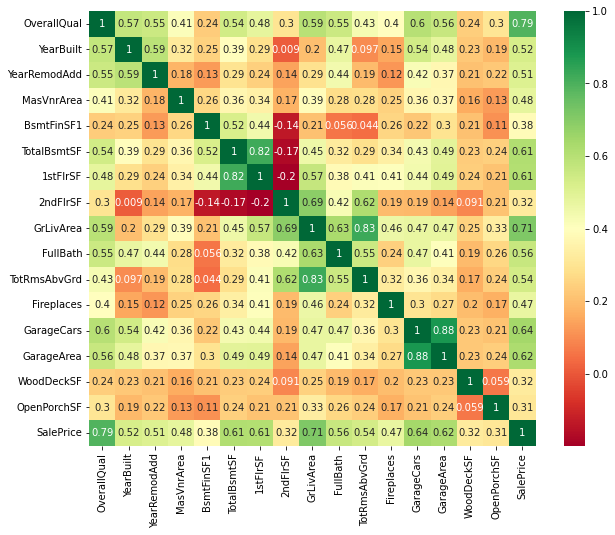

In [42]:
#houses2[corr_saleprice].corr()

plt.subplots(figsize=(10,8))
sns.heatmap(houses2[corr_saleprice].corr(),cmap= 'RdYlGn',vmin=None, vmax=None,annot=True)
plt.show()

In [43]:
corr_saleprice

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

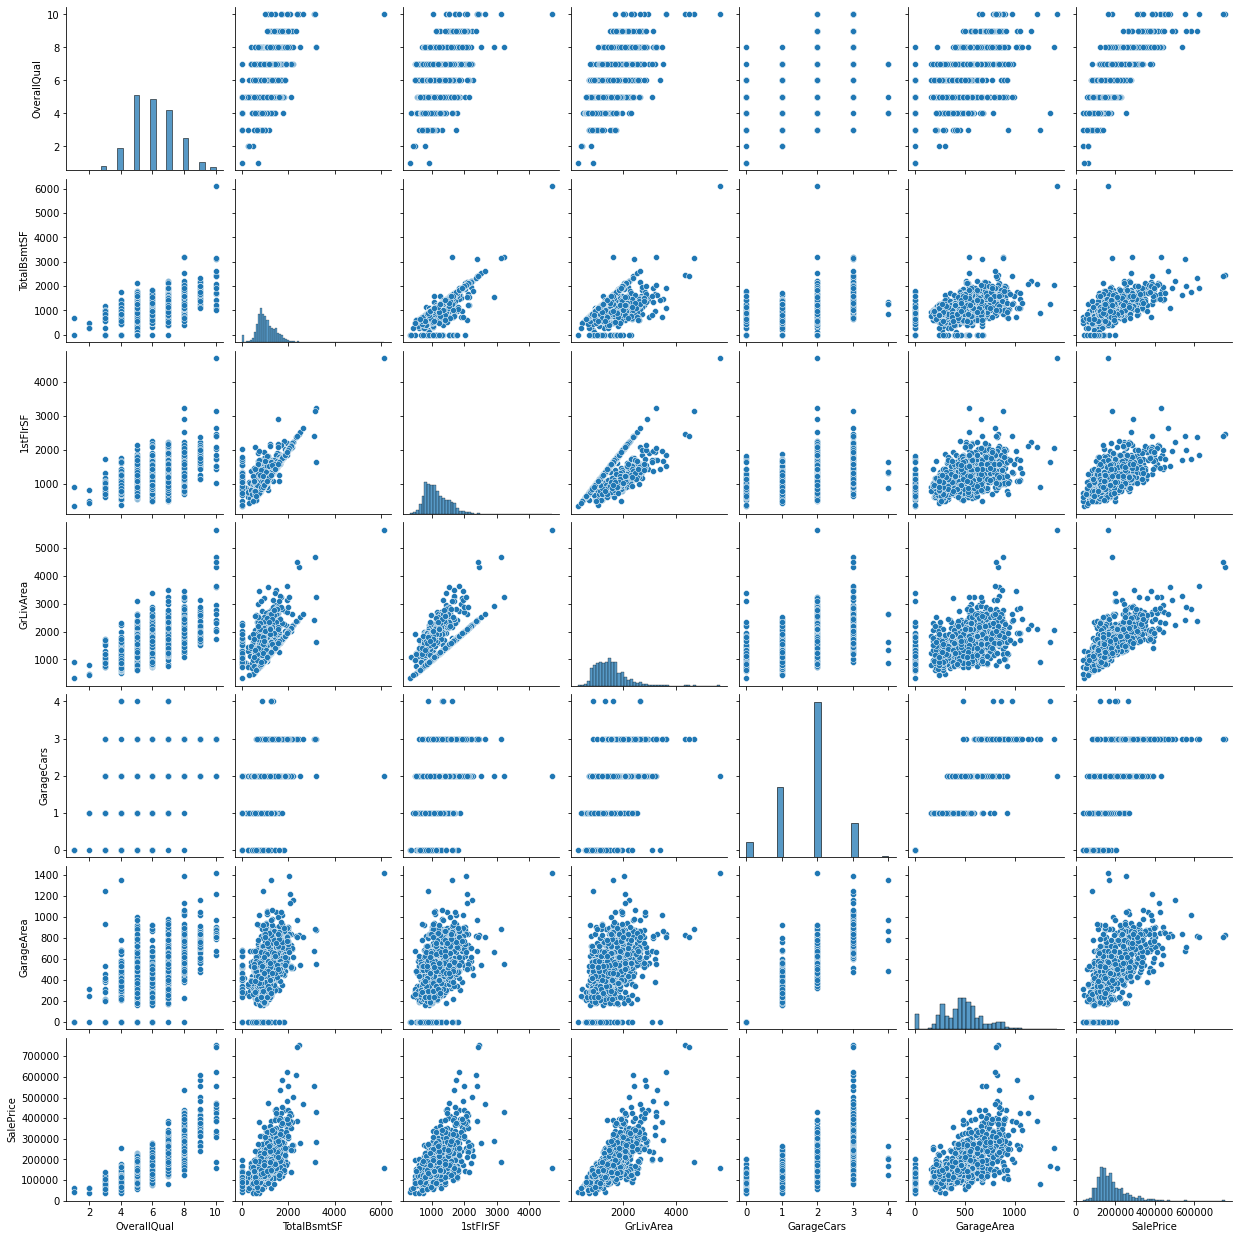

In [44]:

sns.pairplot(houses2, vars=['OverallQual','TotalBsmtSF', '1stFlrSF','GrLivArea','GarageCars','GarageArea','SalePrice'])

In [45]:
#sns.scatterplot(data=houses2, x="OverallQual", y="SalePrice")
houses2["log_SalePrice"] = np.log(houses2["SalePrice"])


/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/43190931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses2["log_SalePrice"] = np.log(houses2["SalePrice"])


In [46]:
#houses2["log_GrLivArea"] = np.log(houses2["GrLivArea"])

In [47]:
houses2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


In [70]:
#MODELO REGRESION LINEAL 
x=houses2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF']]#,'log_SalePrice']]
y=houses2['SalePrice']
y_log= np.log(houses2["SalePrice"])
print(x.shape)
print(y_log.shape)

(1451, 16)
(1451,)


In [152]:
x_train, x_test, y_train,y_test = train_test_split(x,y_log,test_size=0.20,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1160, 16)
(291, 16)
(291,)
(1160,)


In [51]:
houses2_model= LinearRegression()

In [52]:
houses2_model.fit(x_train,y_train)

LinearRegression()

In [53]:
predicted_y = houses2_model.predict(x_test)


In [60]:
r2_lr = r2_score(y_test,predicted_y)
r2_lr

0.8453117435373466

In [62]:
#El error estandar se traducte en UDS
std_lr =np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(predicted_y))), 2)
std_lr

26088.13

In [94]:
#Creando el Dataframe
df = pd.DataFrame()
df['Método'] = ['Linear-regression']
df['r2_score'] = [lr]
df['Diferencia en dls'] = [std_lr]

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

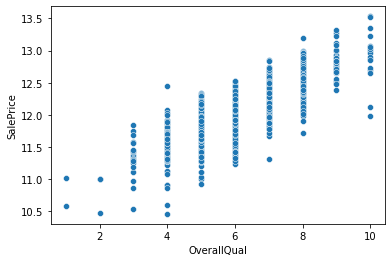

In [65]:
y_log=np.log(houses2["SalePrice"])
sns.scatterplot(data=houses2, x="OverallQual", y=y_log)

In [246]:
#HACIENDO MODELOS NO LINEALES CON LAS MISMAS VARIABLES


In [72]:
#MODELO DEL VECINO MÁS CERCANO
from sklearn.neighbors import KNeighborsRegressor

In [77]:
knn_fit = KNeighborsRegressor(n_neighbors=6)
knn_fit.fit(x_train, y_train)##

KNeighborsRegressor(n_neighbors=6)

In [78]:
y_pred_knn = knn_fit.predict(x_test)

In [82]:
#era mas alto sin el log
r2_kn=r2_score(y_test,y_pred_knn)
r2_kn

0.7471707651515787

In [81]:
std_kn =np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_knn))), 2)
std_kn

36167.71

In [96]:
#Creando el Dataframe
df = df.append({'Método': 'KNeighborsRegressor', 'r2_score':r2_kn, 'Diferencia en dls':std_kn}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/2930296611.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'KNeighborsRegressor', 'r2_score':r2_kn, 'Diferencia en dls':std_kn}, ignore_index=True)


In [98]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor

In [186]:
#Para este mètodo no usamos el log_de price 
x_train, x_test, y_train,y_test = train_test_split(x,y_log,test_size=0.20,random_state=42)

In [187]:
dt_fit = DecisionTreeRegressor()
dt_fit.fit(x_train, y_train)

DecisionTreeRegressor()

In [188]:
y_pred_tree = dt_fit.predict(x_test)


In [189]:
#fue mas alto con el log
dt_r2=r2_score(y_test,y_pred_tree)
dt_r2

0.719042248447844

In [191]:
std_dt=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_tree))), 2)
std_dt

32774.81

In [192]:
df = df.append({'Método': 'DecisionTreeRegressor', 'r2_score':dt_r2, 'Diferencia en dls':std_dt}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/1102084161.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'DecisionTreeRegressor', 'r2_score':dt_r2, 'Diferencia en dls':std_dt}, ignore_index=True)


In [181]:
#Tratando de mejorar el modelo con las mismas variables 

dt_fit = DecisionTreeRegressor(max_depth=5)
dt_fit.fit(x_train, y_train)
y_pred_overfit_tree = dt_fit.predict(x_test)
#tb_test["pred_dt_SalePrice"] = np.exp(y_pred)
#np.round(np.sqrt(mean_squared_error(tb_test["SalePrice"], tb_test["pred_dt_SalePrice"])), 2)

In [182]:
r2_dt2=r2_score(y_test,y_pred_overfit_tree)
r2_dt2

0.7876478321957427

In [183]:
std_dt2=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_overfit_tree))), 2)
std_dt2

31362.1

In [184]:
df = df.append({'Método': 'DecisionTreeRegressor(depth 5)', 'r2_score':r2_dt2, 'Diferencia en dls':std_dt2}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/2410741769.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'DecisionTreeRegressor(depth 5)', 'r2_score':r2_dt2, 'Diferencia en dls':std_dt2}, ignore_index=True)


In [198]:
#Modelo Rain Forest Regression 
from sklearn.ensemble import RandomForestRegressor

In [199]:
rf_fit = RandomForestRegressor(n_estimators=1000, max_depth=16)  # RandomStumps
rf_fit.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=1000)

In [200]:
y_pred_RF = rf_fit.predict(x_test)

In [202]:
#Muy bueno!
r2_rf=r2_score(y_test,y_pred_RF)
r2_rf

0.8662608288902237

In [204]:
std_rf=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_RF))), 2)
std_rf

23066.55

In [205]:
df = df.append({'Método': 'RandomForestRegressor', 'r2_score':r2_rf, 'Diferencia en dls':std_rf}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/13295520.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'RandomForestRegressor', 'r2_score':r2_rf, 'Diferencia en dls':std_rf}, ignore_index=True)


In [207]:
#Método GridSearchCV
from sklearn.model_selection import GridSearchCV

In [208]:
hyper_parameters = {"n_estimators": range(10, 1001, 200), "max_depth": range(1, 20, 5)}
rf_fit = RandomForestRegressor()
cv_rf_fit = GridSearchCV(rf_fit, hyper_parameters, n_jobs=-1)

In [209]:
cv_rf_fit.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20, 5),
                         'n_estimators': range(10, 1001, 200)})

In [210]:
#mejor estimador 
cv_rf_fit.best_estimator_

RandomForestRegressor(max_depth=16, n_estimators=610)

In [211]:
#era mejor sin el log
y_pred_Grid = cv_rf_fit.predict(x_test)

In [213]:
r2_gd=r2_score(y_test,y_pred_Grid)
r2_gd

0.867448157121792

In [214]:
std_gd=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_Grid))), 2)
std_gd

22908.05

In [215]:
df = df.append({'Método': 'GridSearchCV', 'r2_score':r2_gd, 'Diferencia en dls':std_gd}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/2078345832.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'GridSearchCV', 'r2_score':r2_gd, 'Diferencia en dls':std_gd}, ignore_index=True)


In [217]:
#Haciendolo con los mejores estimadores 
hyper_parameters = {"n_estimators": range(10,60,1), "max_depth": range(1,8,1)}
rf_fit = RandomForestRegressor()
cv_rf_fit = GridSearchCV(rf_fit, hyper_parameters, n_jobs=-1)

In [222]:
cv_rf_fit.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 8),
                         'n_estimators': range(10, 60)})

In [223]:
cv_rf_fit.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=57)

In [224]:
y_pred_Grid = cv_rf_fit.predict(x_test)

In [225]:
#Pos esta mejor el este tamnbién
r2_gd2=r2_score(y_test,y_pred_Grid)
r2_gd2

0.8631270788030737

In [226]:
std_gd2=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_Grid))), 2)
std_gd2

23751.36

In [227]:
df = df.append({'Método': 'GridSearchCV(best-fit)', 'r2_score':r2_gd2, 'Diferencia en dls':std_gd2}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/1356351340.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'GridSearchCV(best-fit)', 'r2_score':r2_gd2, 'Diferencia en dls':std_gd2}, ignore_index=True)


In [229]:
#MODELO CATBOOST
!pip install catboost

In [230]:
import catboost as cat
from catboost import CatBoostRegressor

In [231]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)

In [232]:
cat_fit.fit(x_train, y_train, eval_set=(x_test, y_test))

In [233]:
y_pred_cat = cat_fit.predict(x_test)

In [234]:
r2_cb=r2_score(y_test,y_pred_cat)
r2_cb

0.8768899680713423

In [235]:
#THE BEST!!
std_cb=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_cat))), 2)
std_cb

21766.03

In [236]:
df = df.append({'Método': 'CatBoostRegressor', 'r2_score':r2_cb, 'Diferencia en dls':std_cb}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/759172258.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'CatBoostRegressor', 'r2_score':r2_cb, 'Diferencia en dls':std_cb}, ignore_index=True)


In [239]:
df.sort_values(by='Diferencia en dls',ascending=True)

,Método,r2_score,Diferencia en dls
7,CatBoostRegressor,0.876890,21766.03
5,GridSearchCV,0.867448,22908.05
4,RandomForestRegressor,0.866261,23066.55
6,GridSearchCV(best-fit),0.863127,23751.36
0,Linear-regression,0.845312,26088.13
2,DecisionTreeRegressor(depth 5),0.787648,31362.10
3,DecisionTreeRegressor,0.719042,32774.81
1,KNeighborsRegressor,0.747171,36167.71


In [240]:
#Explorando con variables categóricas 
houses2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


In [243]:
houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [ ]:
is_numeric2=

In [278]:
#haciendo los dummies 
#houses2_dummies = pd.get_dummies(houses2, columns=['Neighborhood','SaleType'], drop_first=True)
#houses2_dummies.head()

In [279]:
#x=houses2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF']]


#x= tb_model['Detractor'] * tb_model['log_GrLivArea']
#tb_model['neutral_Area'] = tb_model['Neutral'] * tb_model['log_GrLivArea']
#tb_model['promoter_Area'] = tb_model['Promoter'] * tb_model['log_GrLivArea']
#tb_model.head()

In [268]:
is_numeric2= houses2._get_numeric_data()
is_numeric2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,12.072541
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,12.254863
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,12.493130
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,11.864462


In [269]:
x=is_numeric2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF']]

In [270]:
x2=houses2[['Neighborhood','SaleType']]

In [283]:
xx = pd.concat([x, x2],axis=1)
y_log= np.log(houses2["SalePrice"])


In [288]:
houses2_dummies = pd.get_dummies(xx, columns=['Neighborhood','SaleType'], drop_first=True)
houses2_dummies

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,Neighborhood_Timber,Neighborhood_Veenker,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,0,0,0,0,0,0,0,0,0,1
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,0,1,0,0,0,0,0,0,0,1
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,0,0,0,0,0,0,0,0,0,1
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,0,0,0,0,0,0,0,0,0,1
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,0,953,953,694,1647,2,...,0,0,0,0,0,0,0,0,0,1
1456,6,1978,1988,119.0,790,1542,2073,0,2073,2,...,0,0,0,0,0,0,0,0,0,1
1457,7,1941,2006,0.0,275,1152,1188,1152,2340,2,...,0,0,0,0,0,0,0,0,0,1
1458,5,1950,1996,0.0,49,1078,1078,0,1078,1,...,0,0,0,0,0,0,0,0,0,1


In [316]:
#Haciendo los tres mejores métodos
#Random Forest
x_train, x_test, y_train,y_test = train_test_split(houses2_dummies,y_log,test_size=0.20,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1160, 48)
(291, 48)
(291,)
(1160,)


In [291]:
rf_fit2 = RandomForestRegressor(n_estimators=1000, max_depth=16)  # RandomStumps
rf_fit2.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=1000)

In [292]:
y_pred_RF2 = rf_fit2.predict(x_test)

In [293]:
r2_rf2=r2_score(y_test,y_pred_RF2)
r2_rf2

0.8757745702432166

In [294]:
std_rf2=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_RF2))), 2)
std_rf2

22061.35

In [295]:
df = df.append({'Método': 'RandomForestRegressor (categorical)', 'r2_score':r2_rf2, 'Diferencia en dls':std_rf2}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/4038454543.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'RandomForestRegressor (categorical)', 'r2_score':r2_rf2, 'Diferencia en dls':std_rf2}, ignore_index=True)


In [ ]:
#GridSearchCV

In [296]:
hyper_parameters = {"n_estimators": range(10, 1001, 200), "max_depth": range(1, 20, 5)}
rf_fit = RandomForestRegressor()
cv_rf_fit = GridSearchCV(rf_fit, hyper_parameters, n_jobs=-1)

In [297]:
cv_rf_fit.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20, 5),
                         'n_estimators': range(10, 1001, 200)})

In [298]:
cv_rf_fit.best_estimator_

RandomForestRegressor(max_depth=16, n_estimators=810)

In [299]:
y_pred_Grid2 = cv_rf_fit.predict(x_test)

In [300]:
r2_gd22=r2_score(y_test,y_pred_Grid)
r2_gd22

0.8631270788030737

In [301]:
std_gd22=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_Grid2))), 2)
std_gd22

22273.27

In [302]:
df = df.append({'Método': 'GridSearchCV (categorical)', 'r2_score':r2_gd22, 'Diferencia en dls':std_gd22}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/2213778367.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': 'GridSearchCV (categorical)', 'r2_score':r2_gd22, 'Diferencia en dls':std_gd22}, ignore_index=True)


In [ ]:
#CatBoostRegressor

In [317]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)

In [318]:
cat_fit.fit(x_train, y_train, eval_set=(x_test, y_test))

In [319]:
y_pred_cat2 = cat_fit.predict(x_test)

In [320]:
r2_cb2=r2_score(y_test,y_pred_cat)
r2_cb2

0.8768899680713423

In [321]:
std_cb2=np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_cat))), 2)
std_cb2

21766.03

In [312]:
df = df.append({'Método': ' CatBoostRegressor (categorical)', 'r2_score':r2_cb2, 'Diferencia en dls':std_cb2}, ignore_index=True)

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_1068/3994529645.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Método': ' CatBoostRegressor (categorical)', 'r2_score':r2_cb2, 'Diferencia en dls':std_cb2}, ignore_index=True)


In [315]:
df.sort_values(by='Diferencia en dls',ascending=True)

,Método,r2_score,Diferencia en dls
7,CatBoostRegressor,0.876890,21766.03
10,CatBoostRegressor (categorical),0.876890,21766.03
8,RandomForestRegressor (categorical),0.875775,22061.35
9,GridSearchCV (categorical),0.863127,22273.27
5,GridSearchCV,0.867448,22908.05
4,RandomForestRegressor,0.866261,23066.55
6,GridSearchCV(best-fit),0.863127,23751.36
0,Linear-regression,0.845312,26088.13
2,DecisionTreeRegressor(depth 5),0.787648,31362.10
3,DecisionTreeRegressor,0.719042,32774.81
